# Andrea analysis
### this notebook analyses the output of a small test experiment
### the dataset contains one WT and two mutants samples

In [1]:
#upload some library
import pandas as pd
import os
import seaborn as sns
from ttp import get_data
import missingno as msno
import numpy as np

In [2]:
#get data
file_name = os.path.join('indata','proteinGroups.txt')
df = pd.read_csv(file_name, sep='\t')
df.head()

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,HexNAc (ST) site IDs,Oxidation (M) site IDs,HexNAc (ST) site positions,Oxidation (M) site positions
0,A0A0B4JD11;Q9NJH0,A0A0B4JD11;Q9NJH0,2;2,2;2,2;2,Elongation factor 1-gamma,Ef1gamma,"tr|A0A0B4JD11|A0A0B4JD11_DROME Ef1gamma, isofo...",2,2,...,151;381,True;True,169;414,615;1416;1417,499;1150,499;1150,NaN,NaN,NaN,NaN
1,A0A0B4K7I3;A0A0B4K6S2,A0A0B4K7I3;A0A0B4K6S2,1;1,1;1,1;1,NaN,Dscam1,tr|A0A0B4K7I3|A0A0B4K7I3_DROME Down syndrome c...,2,1,...,394,True,430,1478;1479,1203,1203,NaN,NaN,NaN,NaN
2,A0A0B4K812;Q7KNS3,A0A0B4K812;Q7KNS3,2;2,2;2,2;2,Lissencephaly-1 homolog,Lis-1,tr|A0A0B4K812|A0A0B4K812_DROME Lissencephaly-1...,2,2,...,211;374,True;True,235;407,853;1390;1391,706;1129,706;1129,NaN,0,NaN,123
3,A0A0B4K8A5;Q9W2F2,A0A0B4K8A5;Q9W2F2,1;1,1;1,1;1,Protein mahjong,mahj,"tr|A0A0B4K8A5|A0A0B4K8A5_DROME Mahjong, isofor...",2,1,...,375,True,408,1392,1130,1130,NaN,NaN,NaN,NaN
4,O46111;A0A0B4KF46;Q8T0L3,O46111;A0A0B4KF46;Q8T0L3,1;1;1,1;1;1,1;1;1,NaN,Uba1,tr|O46111|O46111_DROME Ubiquitin activating en...,3,1,...,389,True,422,1441;1442;1443,1164;1165,1164,NaN,NaN,NaN,NaN


In [3]:
#select relevant columns
_QUANT_METHODS = ['Reporter intensity corrected ']
_EXP = [' Mutant 1',' Mutant 2', ' WT']
_TP = ['0','1','2','3','4','5','6','7','8','9',]
df = get_data.clean(df, _QUANT_METHODS, _EXP, _TP)

Only identified by site
nothing removed
---------------
removed  2 Reverse
tot  2  entries removed
---------------
removed  10 Potential contaminant
tot  12  entries removed
---------------
got:  254 protein now
removed  23 all zeros
tot  35  entries removed
---------------


### let's see how sparse the dataset is

(231, 30)


10    64
30    38
9     27
29    22
20    20
dtype: int64

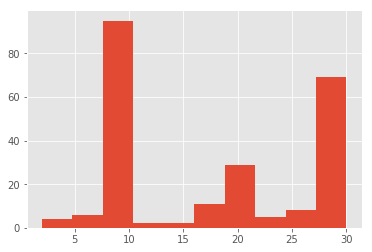

In [27]:
print (df.shape)
df.head()
no_zeros =abs( (df==0).astype(int).sum(axis=1) - df.shape[1])
no_zeros.hist()
no_zeros.value_counts().head()

### It seems that the dataset contains quite a few missing values, let's visualise them

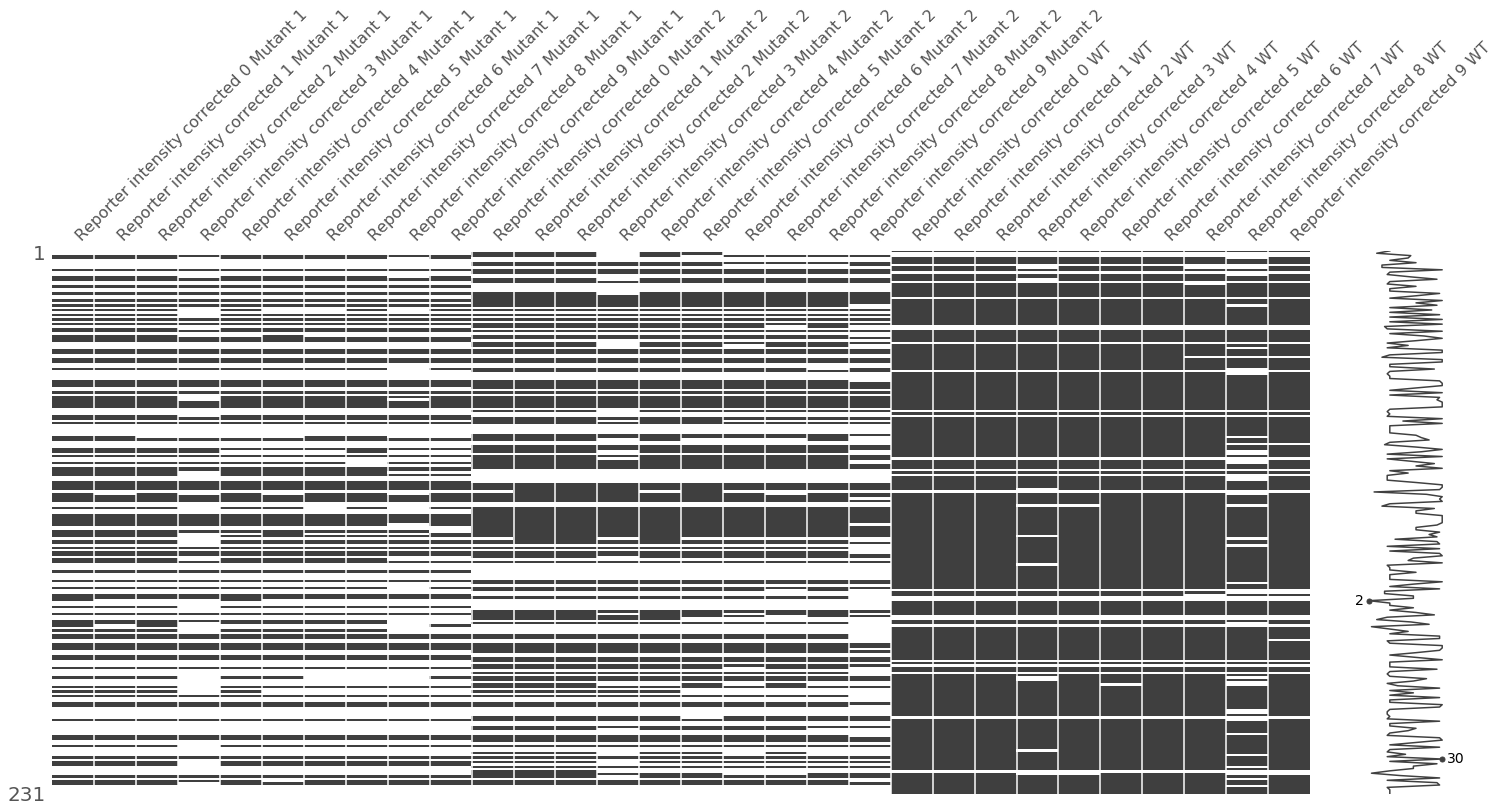

In [6]:
#this plot visualise the missing value as white space between the non-missing black values 
msno.matrix(df.replace(0,np.nan))

### some conclusions:
#### The dataset is small and sparse
#### the mutant dasets contain the majority of the missing values

## Let's now see the data for each experiment, starting with the WT

(204, 10)


,37c,41c,44c,47c,50c,53c,56c,59c,63c,67c
0,25907.00,18595.00,8322.70,3074.9,3202.30,3435.10,16405.00,3032.30,1224.70,3415.30
4,11747.00,10162.00,6582.20,1715.0,1298.80,1836.90,6350.70,990.18,0.00,1161.00
5,20933.00,17088.00,10295.00,1508.6,4886.40,5738.20,39157.00,7606.40,1682.00,1995.00
6,48664.00,59864.00,44176.00,30351.0,44310.00,46450.00,42657.00,42737.00,238.94,46948.00
10,590.91,706.75,202.58,0.0,241.02,201.65,952.12,0.00,0.00,207.43


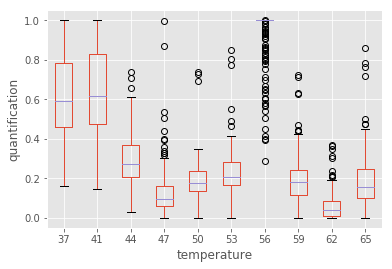

In [26]:
_TM = [37, 41, 44, 47, 50, 53, 56, 59, 63, 67]
wt = df.iloc[:,20:]
wt.columns = [str(n)+'c' for n in _TM]
wt = wt[(wt.T != 0).any()]
print (wt.shape)
get_data.box_plot(wt,get_data.norm_max)
wt.head()

### The Wt experiments would be very difficult to interpreter as the majority of the proteins aggregate after the 44C time point. Also the 56C time point is abnormal, for analysis this data point ( 56C) needs to be replaced (rolling average?)

## L'ets get the two mutants now

(105, 10)


,37c,41c,44c,47c,50c,53c,56c,59c,63c,67c
2,6814.9,3669.30,3307.4,330.120,2389.30,1778.30,1952.10,1784.00,1309.7,1689.00
4,6828.2,6142.00,2033.5,0.000,1017.50,466.94,283.84,300.65,0.0,421.62
11,3821.3,2543.00,2711.3,686.800,8144.40,6881.70,7402.60,11856.00,6741.5,10096.00
14,5625.2,415.07,1398.8,0.000,913.17,289.37,516.54,409.96,0.0,1047.90
15,2697.9,4319.90,1566.0,32.479,1809.00,2440.20,5994.70,4640.20,2850.2,3175.60


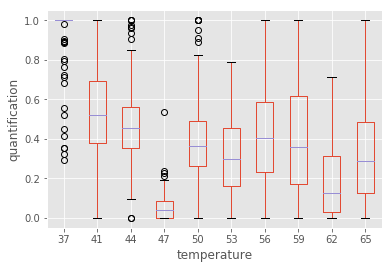

In [28]:
_TM = [37, 41, 44, 47, 50, 53, 56, 59, 63, 67]
mut1 = df.iloc[:,0:10]
mut1.columns = [str(n)+'c' for n in _TM]
mut1 = mut1[(mut1.T != 0).any()]
print (mut1.shape)
get_data.box_plot(mut1,get_data.norm_max)
mut1.head()

(131, 10)


,37c,41c,44c,47c,50c,53c,56c,59c,63c,67c
1,207.75,262.86,171.04,0.00,170.51,203.03,0.0,0.0,0.00,0.00
2,1707.20,1975.70,1966.40,0.00,822.11,0.00,1159.6,979.4,1403.60,341.21
6,4001.60,6584.50,2767.10,1976.50,2297.90,2818.20,2052.0,2209.8,199.01,2781.20
8,336.76,1154.70,273.30,110.29,315.11,320.96,0.0,0.0,0.00,165.77
11,2200.80,3047.30,3053.80,735.57,2639.60,1211.80,2121.9,2332.3,5045.50,908.13


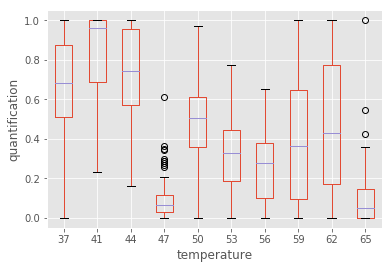

In [29]:
_TM = [37, 41, 44, 47, 50, 53, 56, 59, 63, 67]
mut2 = df.iloc[:,10:20]
mut2.columns = [str(n)+'c' for n in _TM]
mut2 = mut2[(mut2.T != 0).any()]
print (mut2.shape)
get_data.box_plot(mut2, get_data.norm_max)
mut2.head()

### Neither of those look very good, the 47C time point stands out as problematic in both mutant 1 and 2. The distribution of the values is also problematic, it doesn't show a nice sigmoid, but this might be due to the many missing values in these two conditions.